## Getting Started with FastDup

This is a walkthrough on how to install and run FastDup to find image-duplicates & \
near-duplicated on the *hotel-id-to-combat-human-trafficking-2022-fgvc9*
cvpr-2022 workshop competition.

Kaggle competition link: https://www.kaggle.com/competitions/hotel-id-to-combat-human-trafficking-2022-fgvc9/data

### 1. Installing FastDup

In [44]:
!pip install fastdup

### 2. Downloading Competition Data
Note: see installation instruction for kaggle-api here: https://github.com/Kaggle/kaggle-api 

In [4]:
import os
import shutil
data_dir = 'hotel-id-to-combat-human-trafficking-2022-fgvc9/data'

if not os.path.exists(data_dir):
    os.makedirs(data_dir)

In [17]:
!kaggle competitions download -c hotel-id-to-combat-human-trafficking-2022-fgvc9

100%|██████████████████████████████████████▉| 14.0G/14.0G [00:57<00:00, 335MB/s]
100%|███████████████████████████████████████| 14.0G/14.0G [01:03<00:00, 236MB/s]


In [5]:
!unzip -q hotel-id-to-combat-human-trafficking-2022-fgvc9.zip -d hotel-id-to-combat-human-trafficking-2022-fgvc9/data
shutil.rmtree('hotel-id-to-combat-human-trafficking-2022-fgvc9/data/train_masks')

### 3. Running FastDup

In [10]:
import fastdup
print(fastdup.__version__)

JPY_PARENT_PID=1754
0.34


In [31]:
results_dir = 'hotel-id-to-combat-human-trafficking-2022-fgvc9/results'

In [40]:
fastdup.run(input_dir=data_dir, work_dir=results_dir)

Going to loop over dir hotel-id-to-combat-human-trafficking-2022-fgvc9/data
Found total 44704 images to run on


### 4. Displaying Similarity Gallery

In [32]:
from IPython.display import HTML

#### 4.1 Displaying top ranking similar images 
Displaying the top-15 ranking similar pairs. They are taken from the *similarity.csv*
output file which containes similar pairs ordered by similarity.

100%|██████████| 15/15 [00:01<00:00, 11.19it/s]

Stored similarity visual view in  hotel-id-to-combat-human-trafficking-2022-fgvc9/results/similar-gallery-top/similarity.html



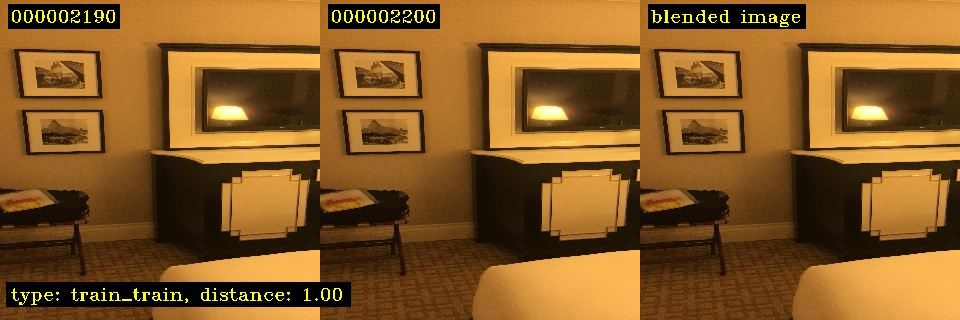
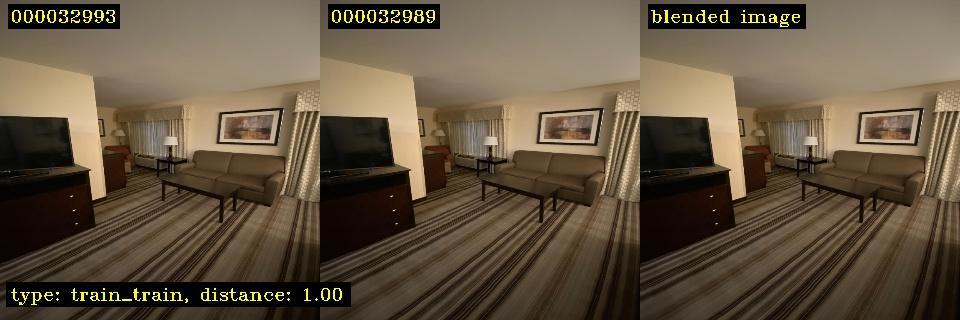
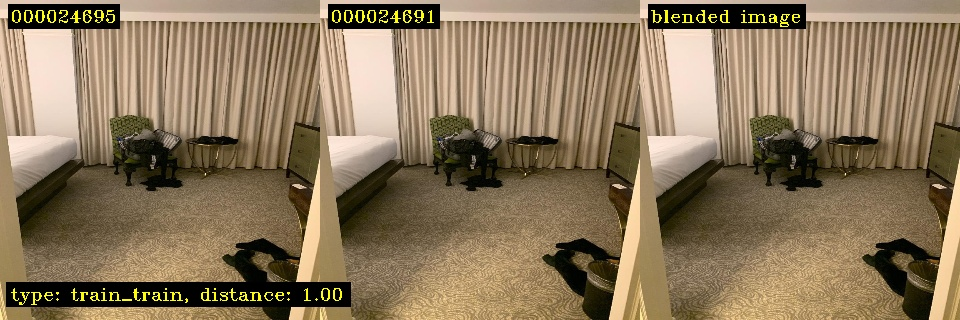
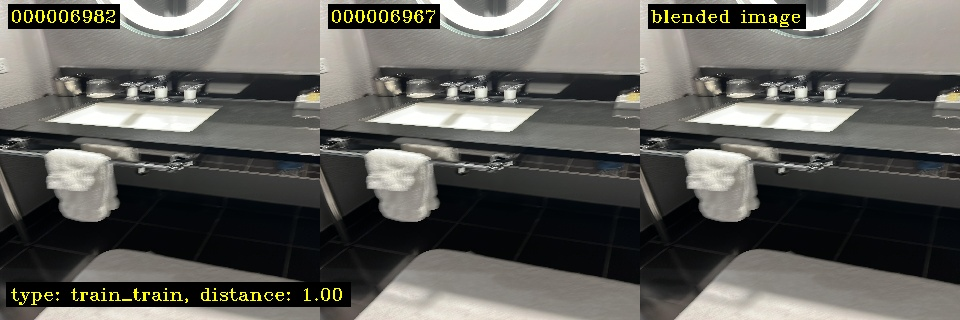
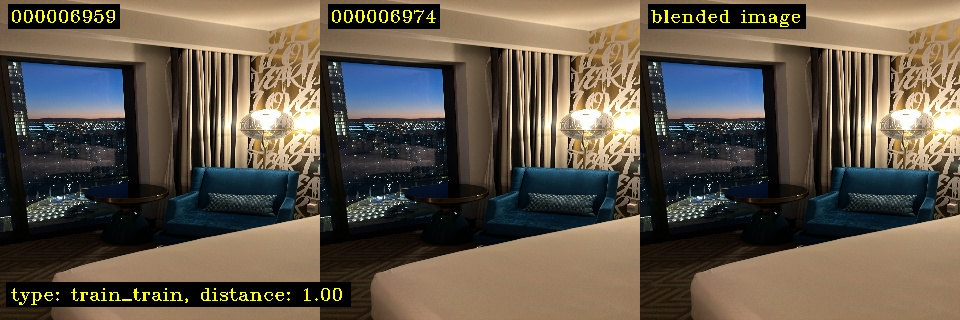
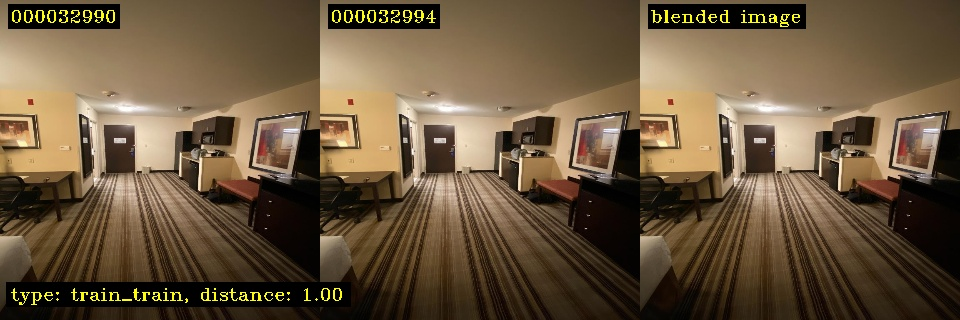
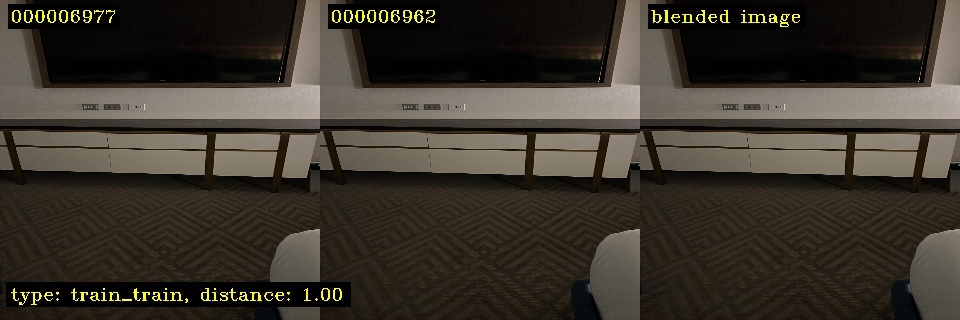
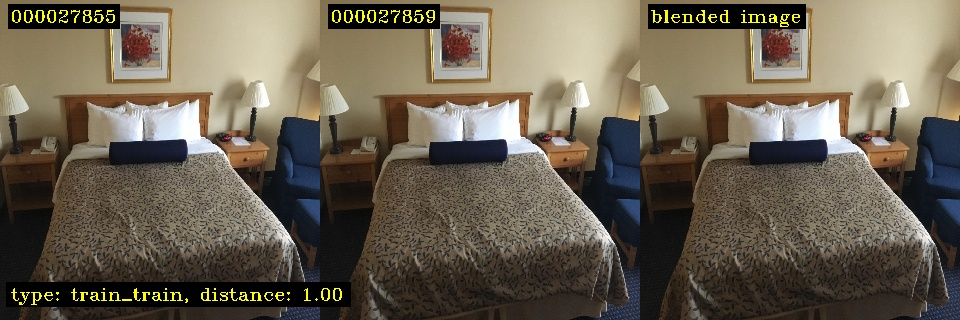
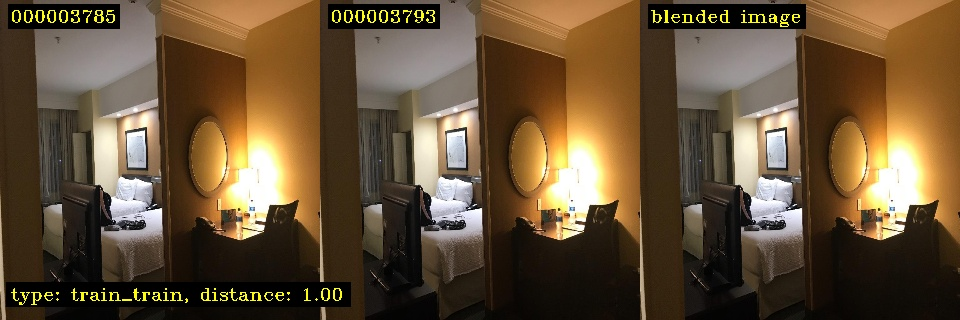
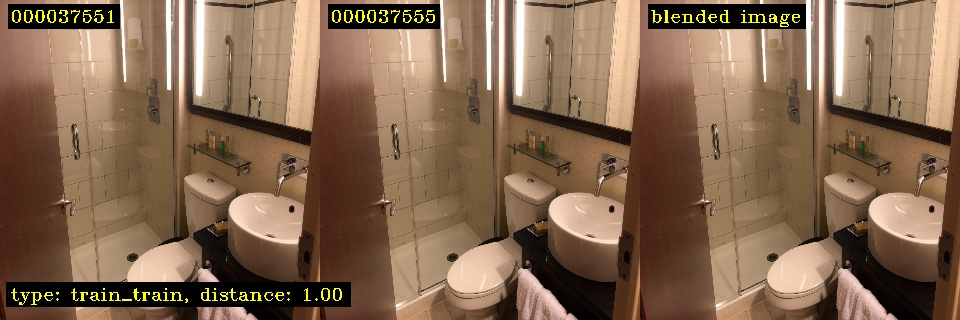
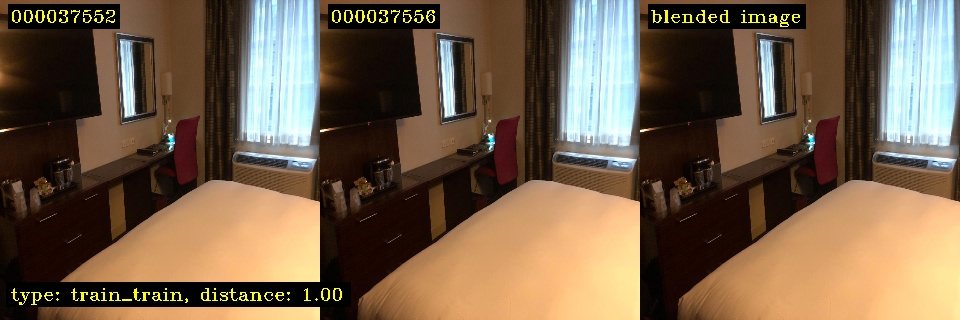
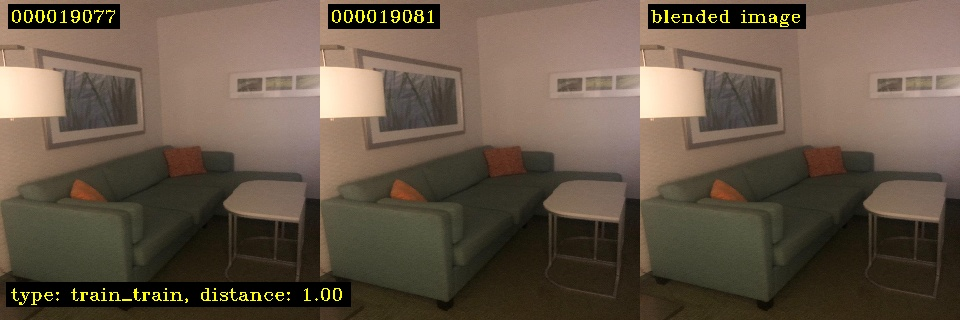
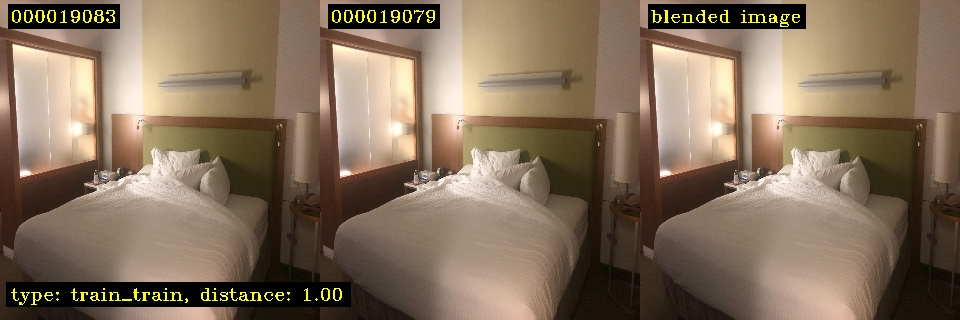
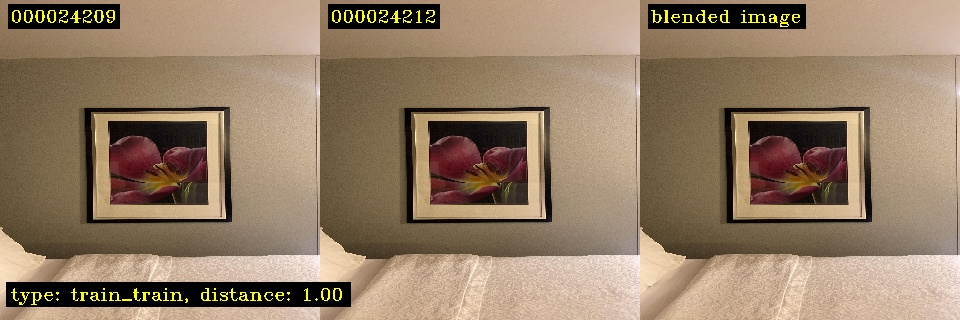
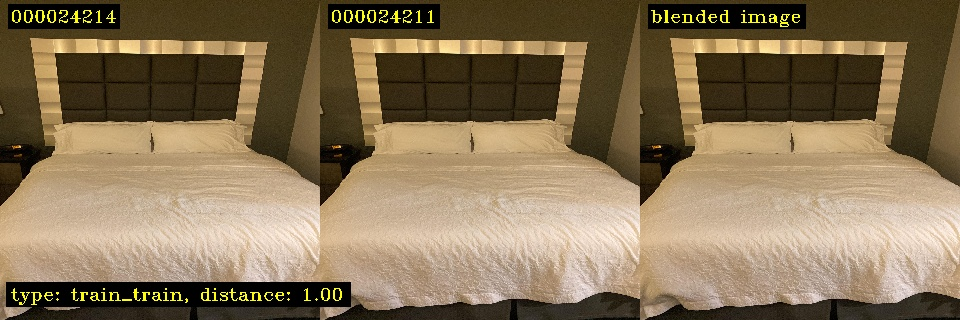

In [42]:
similar_gallery_save_path = os.path.join(results_dir, 'similar-gallery-top')
if not os.path.exists(similar_gallery_save_path):
    os.makedirs(similar_gallery_save_path)
    
similarity_file = os.path.join(results_dir, 'similarity.csv')
fastdup.create_duplicates_gallery(similarity_file, save_path=similar_gallery_save_path, 
                                  num_images=15, descending=True)

gallery_file_name = os.path.join(similar_gallery_save_path, 'similarity.html')
HTML(filename=gallery_file_name)

#### 4.2 Display Outliers
Displaying outliers, which are the images farthest away from all other images in the dataset.
They are taken from the *outliers.csv*

100%|██████████| 15/15 [00:02<00:00,  5.96it/s]


Stored similarity visual view in  hotel-id-to-combat-human-trafficking-2022-fgvc9/results/outliers-gallery/similarity.html



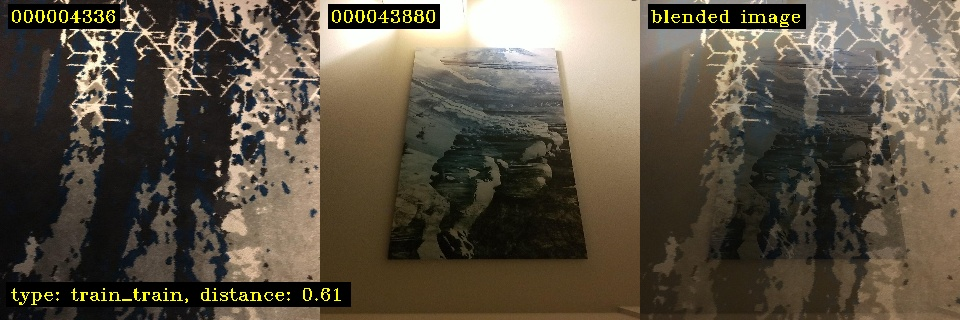
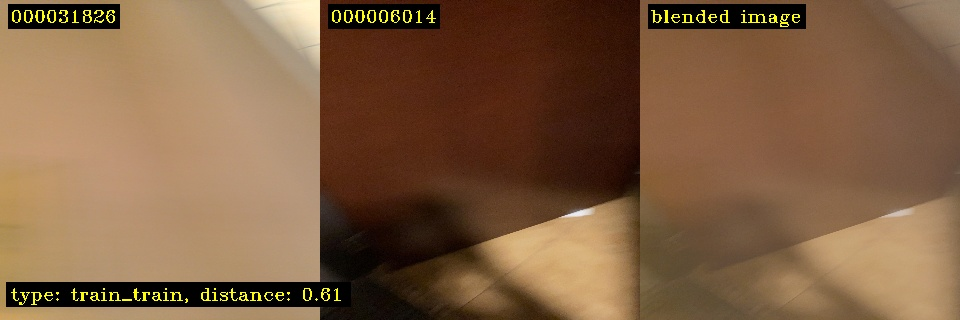
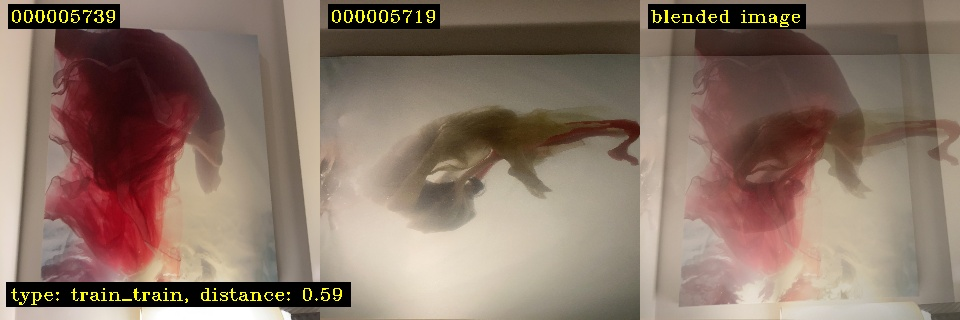
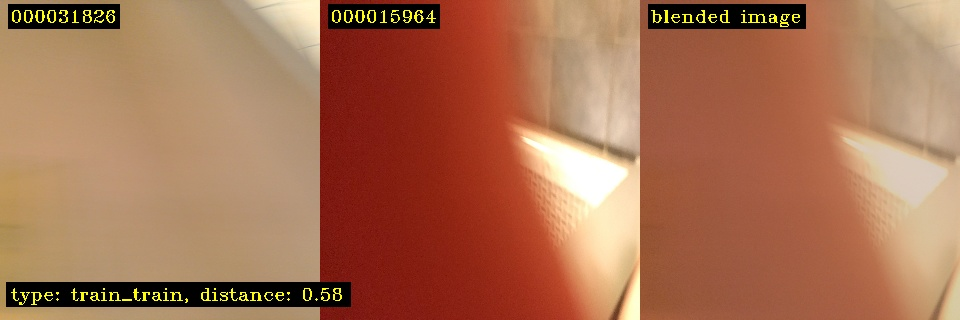
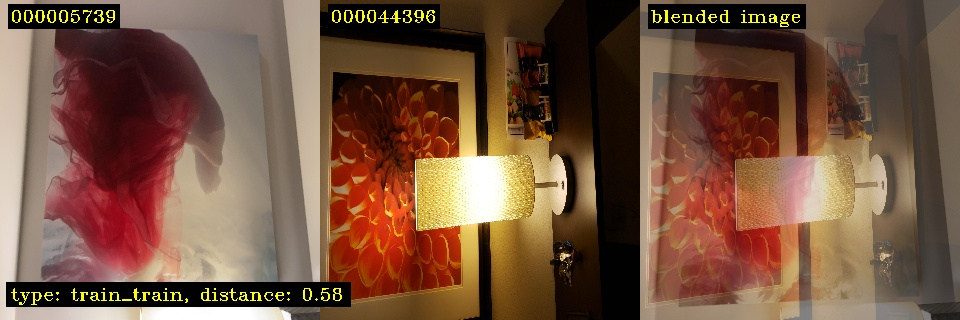
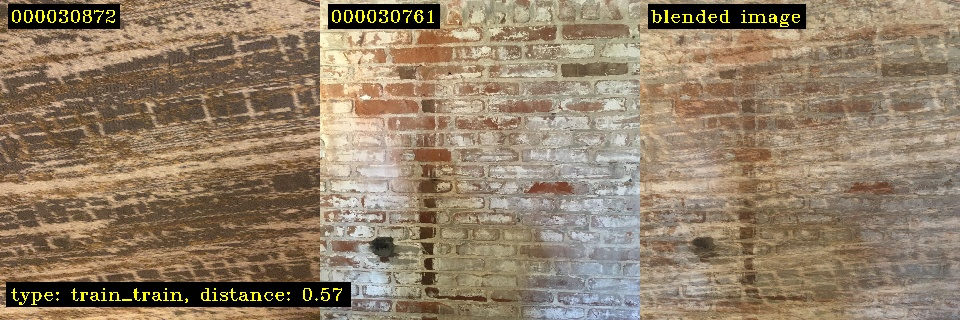
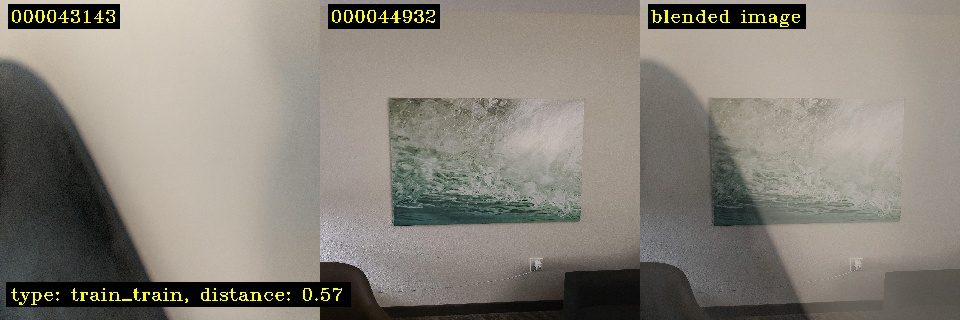
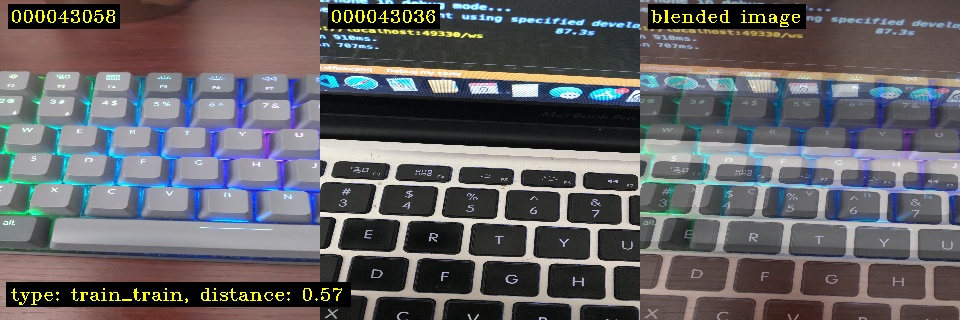
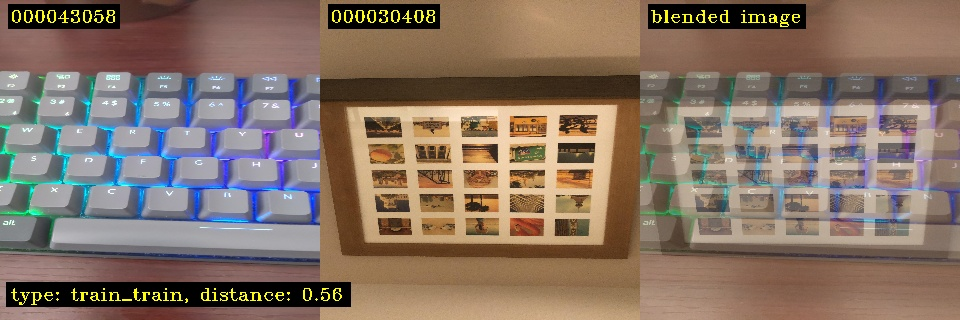
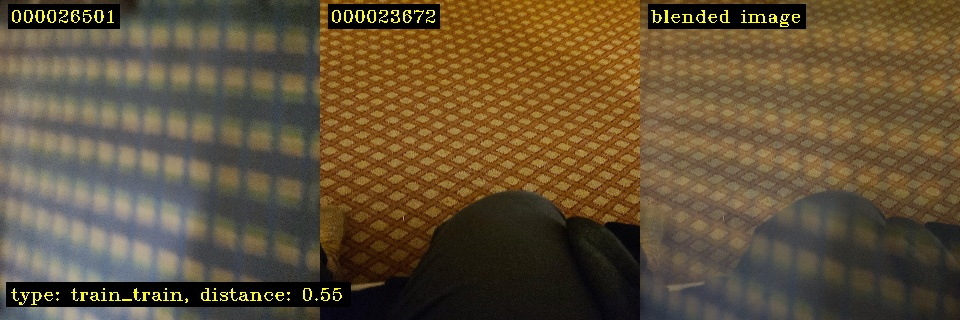
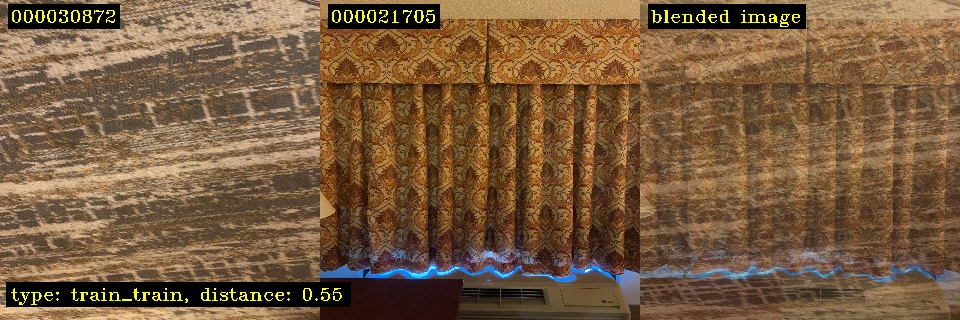
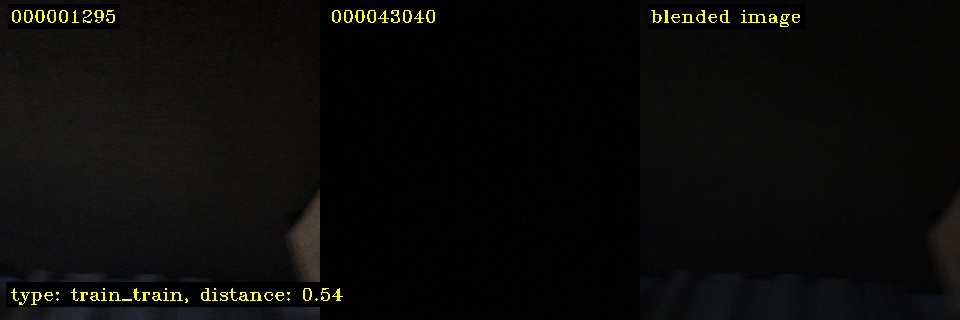
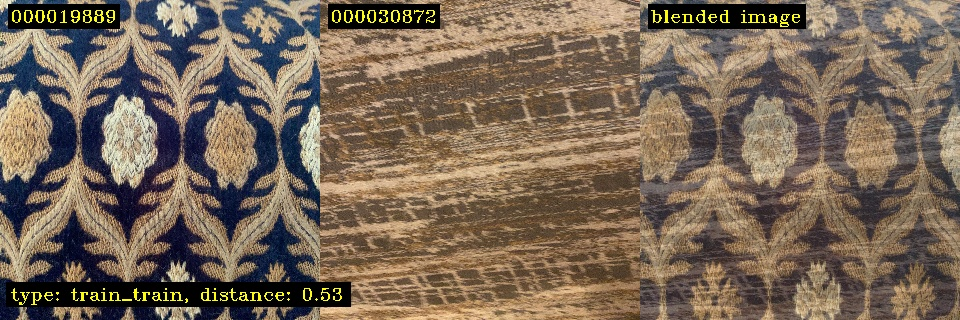
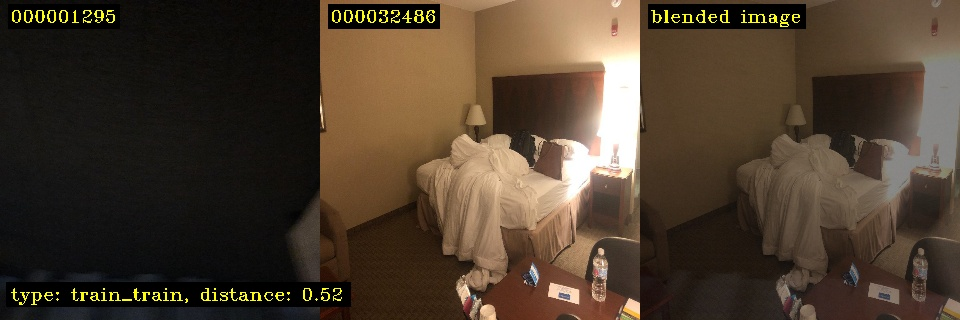
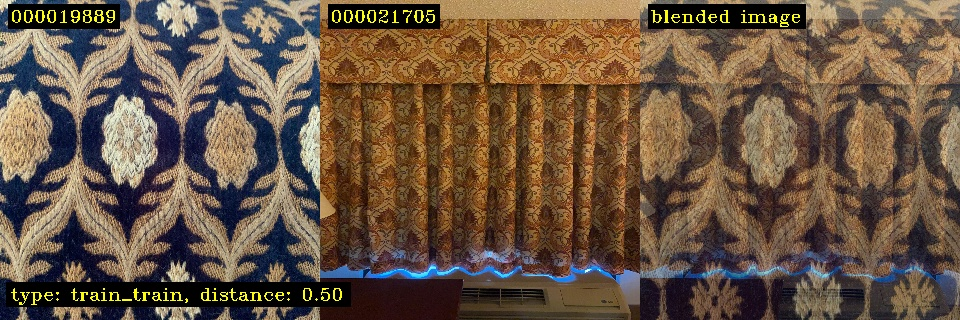

In [38]:
outliers_gallery_save_path = os.path.join(results_dir, 'outliers-gallery')
if not os.path.exists(outliers_gallery_save_path):
    os.makedirs(outliers_gallery_save_path)
    
outliers_file = os.path.join(results_dir, 'outliers.csv')
fastdup.create_duplicates_gallery(outliers_file, save_path=outliers_gallery_save_path, 
                                  num_images=15, descending=False)

gallery_file_name = os.path.join(outliers_gallery_save_path, 'similarity.html')
HTML(filename=gallery_file_name)